# Map showing Haro, Rosario and San Juan Channel

Based on Ben's code from: https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.cm as cma
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc

In [2]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jun18/SalishSea_1d_20180601_20180601_grid_T.nc')
jan18_sal = jan18_data['vosaline'][0,5]
jan18_sal.shape

jan18_data['vosaline']

<xarray.DataArray 'vosaline' (time_counter: 1, deptht: 40, y: 898, x: 398)>
[14296160 values with dtype=float32]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2018-06-01T12:00:00
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
Attributes:
    standard_name:  sea_water_reference_salinity
    long_name:      Reference Salinity
    units:          g kg-1

In [3]:
# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_202108.nc')
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
tmask = 1 - mask.tmask[0]

bathy = nc.Dataset('/data/bmoorema/MEOPAR/grid/bathymetry_202108.nc')
# mesh = nc.Dataset('/data/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
plt.rcParams['font.size'] = 14


/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


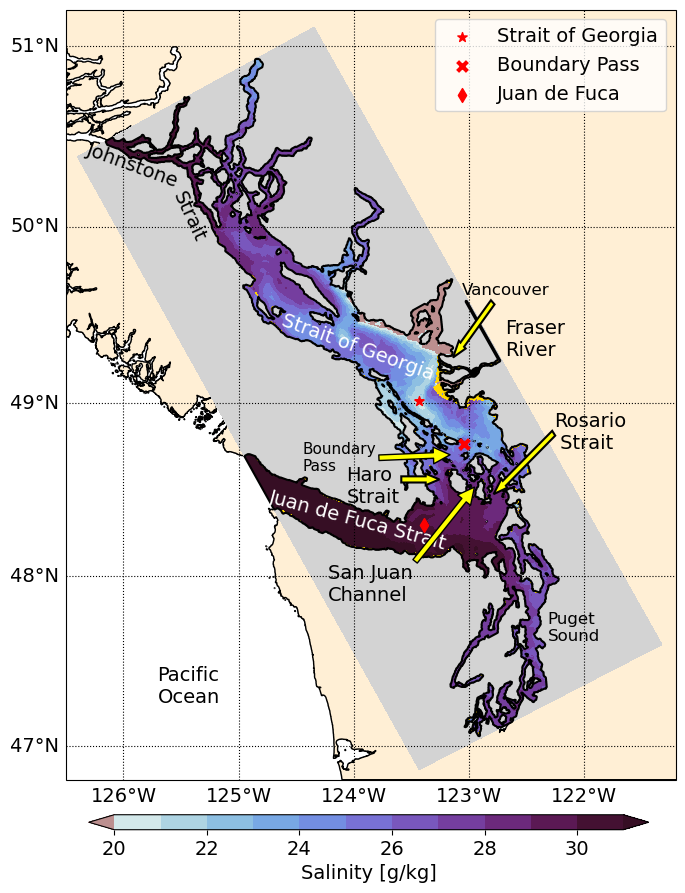

In [4]:
# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_data['vosaline'][0,5], mask=tmask[0])


cmap = cm.dense
cmap.set_bad('papayawhip')
cmap.set_under('rosybrown')

# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20, 32, 1),
    cmap=cm.dense, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contourf'], [ 'gold']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 5, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 

# Overlay domain landmask and coastline
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='papayawhip'))

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes,fontsize=12)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', transform=ax.transAxes, rotation=-15,color='w')
ax.text(0.35, 0.52, 'Strait of Georgia', transform=ax.transAxes, rotation=-20, color='w')
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.70, 'Strait', transform=ax.transAxes, rotation=-65)
ax.text(0.46, 0.36, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.72, 0.55, 'Fraser\nRiver', transform=ax.transAxes)
ax.text(0.80, 0.43, 'Rosario\n Strait', transform=ax.transAxes)
# ax.text(0.75, 0.49, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.65, 0.63, 'Vancouver', transform=ax.transAxes,fontsize=12)
# ax.text(0.44, 0.45, 'Gulf\nIslands', transform=ax.transAxes,fontsize=12)
# ax.text(0.77, 0.37, 'San Juan\nIslands', transform=ax.transAxes,fontsize=12)
ax.arrow(0.55, 0.39, 0.04, 0, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.80, 0.45, -0.081, -0.065, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
# ax.arrow(0.75, 0.51, -0.075, -0.111, head_width=0.015,width=0.008,linewidth = 1.5, edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.70, 0.62, -0.05, -0.055, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)


# ax.text(0.75, 0.49, 'Boundary\nPass', transform=ax.transAxes,fontsize=12)
# ax.arrow(0.75, 0.51, -0.105, -0.073, head_width=0.015,width=0.008,linewidth = 1.5, edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=3)

ax.annotate('San Juan\nChannel',
            xy=(0.67, 0.38), xycoords='axes fraction',
            xytext=(0.43, 0.28), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

#plot sog current meter
sog_x, sog_y = ax.projection.transform_point(-123.429, 49.013, crs.Geodetic())
ax.scatter(sog_x,sog_y,marker = '*',color='r',s=50,zorder=5,label='Strait of Georgia')

#plot bp current meter
bp_x, bp_y = ax.projection.transform_point(-123.03953, 48.7638, crs.Geodetic())
ax.scatter(bp_x,bp_y,marker='x',color='r',s=50,zorder=5,linewidths=3,label='Boundary Pass')

#plot bp current meter
jdf_x, jdf_y = ax.projection.transform_point(-123.39, 48.30074, crs.Geodetic())
ax.scatter(jdf_x,jdf_y,marker='d',color='r',s=50,zorder=5,label='Juan de Fuca')

# ax.annotate('Deception\nPass',
#             xy=(0.74, 0.355), xycoords='axes fraction',
#             xytext=(0.79, 0.34), textcoords='axes fraction', fontsize=12,
#             arrowprops=dict(facecolor='yellow'),
#             verticalalignment='top',horizontalalignment='left')

# ax.annotate('Admiralty\nInlet',
#             xy=(0.72, 0.3), xycoords='axes fraction',
#             xytext=(0.52, 0.22), textcoords='axes fraction', fontsize=14,
#             arrowprops=dict(facecolor='yellow'),
#             verticalalignment='top',horizontalalignment='left')

ax.annotate('Boundary\nPass',
            xy=(0.63, 0.422), xycoords='axes fraction',
            xytext=(0.388, 0.418), textcoords='axes fraction', fontsize=11,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='center',horizontalalignment='left')

ax.legend(facecolor='w')

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# Turn off labels on the top and right
gl.top_labels = False  # Disable labels at the top
gl.right_labels = False  # Disable labels on the right

# Ensure labels on the bottom and left are enabled
gl.bottom_labels = True  # Enable labels at the bottom
gl.left_labels = True  # Enable labels on the left


In [13]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/salishsea_map.png',bbox_inches='tight')

/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


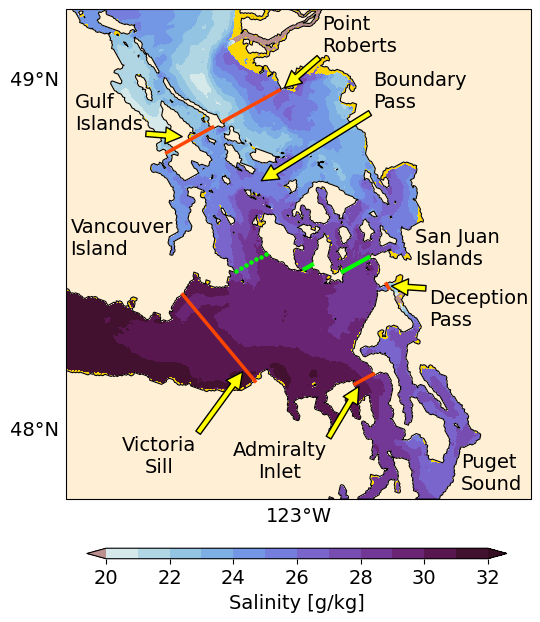

In [5]:
#Plot for boundaries of Ariane runs
import matplotlib.gridspec as gridspec

# Make plot area
xlim, ylim = [-124, -122], [47.8, 49.2]
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))

cmap = cm.dense
# cmap.set_bad('papayawhip')
cmap.set_under('rosybrown')
# reversed_cmap = plt.cm.get_cmap('ocean_r')

# Mask NaN values in the data
# masked_sal = np.ma.masked_array(jan18_sal, mask=tmask[2])

c = ax.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=32, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,33,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)
   
# Overlay domain landmask and coastline
for attr, color in zip([ 'contourf'], [ 'gold']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 5, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 
    
# Overlay domain landmask and coastline
for attr, color in zip([ 'contourf'], [ 'papayawhip']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='papayawhip'))


# Overlay domain landmask and coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Convert geographic coordinates to Mercator projection - VicSill line
vs_start_x, vs_start_y = ax.projection.transform_point(grid.nav_lon[233,190], grid.nav_lat[233,190], crs.Geodetic())
vs_end_x, vs_end_y = ax.projection.transform_point(grid.nav_lon[303,175], grid.nav_lat[303,175], crs.Geodetic())

# Plot the line on the map
ax.plot([vs_start_x, vs_end_x], [vs_start_y, vs_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - PR line
pr_start_x, pr_start_y = ax.projection.transform_point(grid.nav_lon[386,262], grid.nav_lat[386,262], crs.Geodetic())
pr_end_x, pr_end_y = ax.projection.transform_point(grid.nav_lon[386,308], grid.nav_lat[386,308], crs.Geodetic())

# Plot the line on the map
ax.plot([pr_start_x, pr_end_x], [pr_start_y, pr_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Gulf line
gulf_start_x, gulf_start_y = ax.projection.transform_point(grid.nav_lon[386,215], grid.nav_lat[386,215], crs.Geodetic())
gulf_end_x, gulf_end_y = ax.projection.transform_point(grid.nav_lon[386,253], grid.nav_lat[386,253], crs.Geodetic())

# Plot the line on the map
ax.plot([gulf_start_x, gulf_end_x], [gulf_start_y, gulf_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Admiralty line 
adm_start_x, adm_start_y = ax.projection.transform_point(grid.nav_lon[201,252], grid.nav_lat[201,252], crs.Geodetic())
adm_end_x, adm_end_y = ax.projection.transform_point(grid.nav_lon[201,267], grid.nav_lat[201,267], crs.Geodetic())

# Plot the line on the map
ax.plot([adm_start_x, adm_end_x], [adm_start_y, adm_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Deception 
dec_start_x, dec_start_y = ax.projection.transform_point(grid.nav_lon[244,307], grid.nav_lat[244,307], crs.Geodetic())
dec_end_x, dec_end_y = ax.projection.transform_point(grid.nav_lon[247,307], grid.nav_lat[247,307], crs.Geodetic())

# Plot the line on the map
ax.plot([dec_start_x, dec_end_x], [dec_start_y, dec_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Rosario
ros_start_x, ros_start_y = ax.projection.transform_point(grid.nav_lon[267,284], grid.nav_lat[267,284], crs.Geodetic())
ros_end_x, ros_end_y = ax.projection.transform_point(grid.nav_lon[267,305], grid.nav_lat[267,305], crs.Geodetic())

# Plot the line on the map
ax.plot([ros_start_x, ros_end_x], [ros_start_y, ros_end_y], color='lime',lw=3)

# Convert geographic coordinates to Mercator projection - Haro
haro_start_x, haro_start_y = ax.projection.transform_point(grid.nav_lon[300,217], grid.nav_lat[300,217], crs.Geodetic())
haro_end_x, haro_end_y = ax.projection.transform_point(grid.nav_lon[300,242], grid.nav_lat[300,242], crs.Geodetic())

# Plot the line on the map
ax.scatter(np.linspace(haro_start_x, haro_end_x,7), np.linspace(haro_start_y, haro_end_y,7), color='lime',s=5,zorder=3)

# Convert geographic coordinates to Mercator projection - Haro
sjc_start_x, sjc_start_y = ax.projection.transform_point(grid.nav_lon[280,261], grid.nav_lat[280,261], crs.Geodetic())
sjc_end_x, sjc_end_y = ax.projection.transform_point(grid.nav_lon[280,267], grid.nav_lat[280,267], crs.Geodetic())

# Plot the line on the map
ax.plot(np.linspace(sjc_start_x, sjc_end_x,20), np.linspace(sjc_start_y, sjc_end_y,20),color='lime',lw=3)

# # Add annotations

ax.annotate('Point\nRoberts',
            xy=(0.47, 0.84), xycoords='axes fraction',
            xytext=(0.55, 0.99), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('Deception\nPass',
            xy=(0.7, 0.435), xycoords='axes fraction',
            xytext=(0.78, 0.43), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('Victoria\nSill',
            xy=(0.38, 0.26), xycoords='axes fraction',
            xytext=(0.2, 0.13), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')


ax.annotate('Boundary\nPass',
            xy=(0.42, 0.65), xycoords='axes fraction',
            xytext=(0.66, 0.80), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),)

ax.annotate('Admiralty\nInlet',
            xy=(0.63, 0.23), xycoords='axes fraction',
            xytext=(0.46, 0.12), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')

ax.annotate('Gulf\nIslands',
            xy=(0.25, 0.74), xycoords='axes fraction',
            xytext=(0.02, 0.83), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax.transAxes)
ax.text(0.75, 0.48, 'San Juan\nIslands', transform=ax.transAxes);
ax.text(0.85, 0.02, 'Puget\nSound', transform=ax.transAxes);

In [15]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/SJGI_map_ariane_bndys.png',bbox_inches='tight')

/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


Text(0.014, 0.019, '(b)')

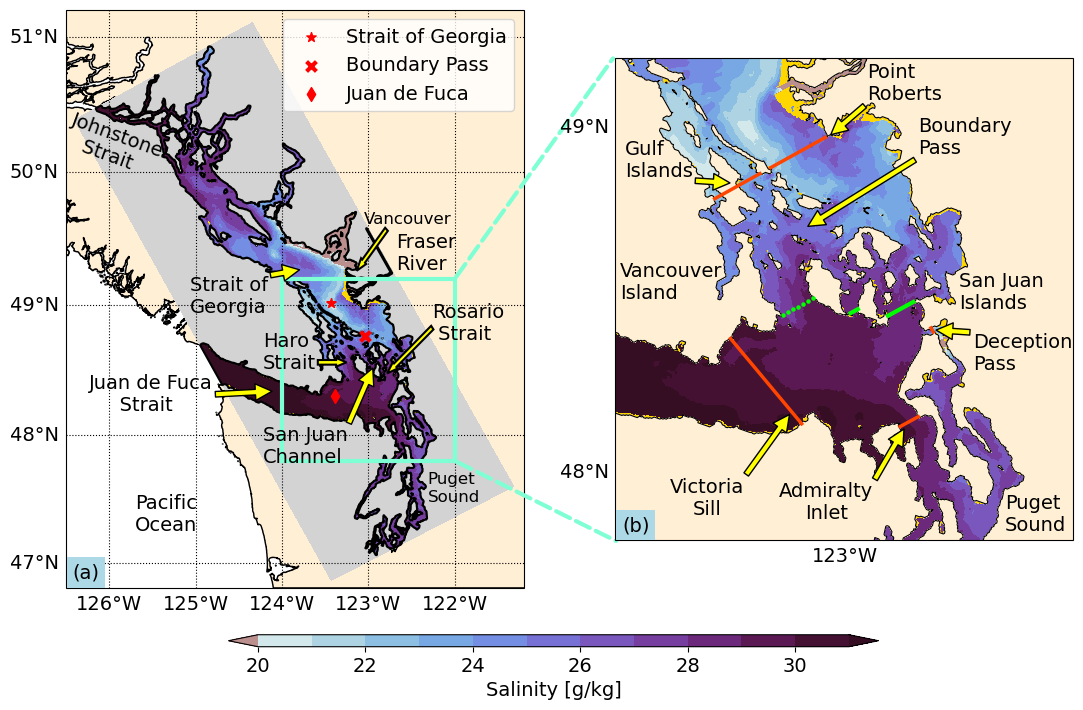

In [6]:

cmap = cm.dense
cmap.set_bad('papayawhip')
cmap.set_under('rosybrown')

# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_data['vosaline'][0,5], mask=tmask[0])

# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
# fig, [ax,ax2] = plt.subplots(1,2,figsize=(13, 15), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})


fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(13, 8),
                               subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20, 32, 1),
    cmap=cm.dense, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contourf'], [ 'gold']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 5, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 

# Overlay domain landmask and coastline
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='papayawhip'))

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.15, 'Puget\nSound', transform=ax.transAxes,fontsize=12)
# ax.text(0.2, 0.26, 'Juan de Fuca\nStrait', transform=ax.transAxes,color='k')
# ax.text(0.4, 0.52, 'Strait of\nGeorgia', transform=ax.transAxes, rotation=-20, color='w')
ax.text(-0.01, 0.71, 'Johnstone\n   Strait', transform=ax.transAxes, rotation=-20)
# ax.text(0.02, 0.71, 'Strait', transform=ax.transAxes, rotation=-20)
ax.text(0.43, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.72, 0.55, 'Fraser\nRiver', transform=ax.transAxes)
ax.text(0.80, 0.43, 'Rosario\n Strait', transform=ax.transAxes)
# ax.text(0.75, 0.49, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.65, 0.63, 'Vancouver', transform=ax.transAxes,fontsize=12)
# ax.text(0.44, 0.45, 'Gulf\nIslands', transform=ax.transAxes,fontsize=12)
# ax.text(0.77, 0.37, 'San Juan\nIslands', transform=ax.transAxes,fontsize=12)
ax.arrow(0.55, 0.39, 0.04, 0, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.80, 0.45, -0.081, -0.065, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
# ax.arrow(0.75, 0.51, -0.075, -0.111, head_width=0.015,width=0.008,linewidth = 1.5, edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.70, 0.62, -0.05, -0.055, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)


# ax.text(0.75, 0.49, 'Boundary\nPass', transform=ax.transAxes,fontsize=12)
# ax.arrow(0.75, 0.51, -0.105, -0.073, head_width=0.015,width=0.008,linewidth = 1.5, edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=3)

ax.annotate('Strait of\nGeorgia',
            xy=(0.51, 0.55), xycoords='axes fraction',
            xytext=(0.27, 0.54), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('San Juan\nChannel',
            xy=(0.67, 0.38), xycoords='axes fraction',
            xytext=(0.43, 0.28), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

#plot sog current meter
sog_x, sog_y = ax.projection.transform_point(-123.429, 49.013, crs.Geodetic())
ax.scatter(sog_x,sog_y,marker = '*',color='r',s=50,zorder=5,label='Strait of Georgia')

#plot bp current meter
bp_x, bp_y = ax.projection.transform_point(-123.03953, 48.7638, crs.Geodetic())
ax.scatter(bp_x,bp_y,marker='x',color='r',s=50,zorder=5,linewidths=3,label='Boundary Pass')

#plot bp current meter
jdf_x, jdf_y = ax.projection.transform_point(-123.39, 48.30074, crs.Geodetic())
ax.scatter(jdf_x,jdf_y,marker='d',color='r',s=50,zorder=5,label='Juan de Fuca')

ax.annotate('Juan de Fuca\n     Strait',
            xy=(0.45, 0.34), xycoords='axes fraction',
            xytext=(0.05, 0.37), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

# ax.annotate('Deception\nPass',
#             xy=(0.74, 0.355), xycoords='axes fraction',
#             xytext=(0.79, 0.34), textcoords='axes fraction', fontsize=12,
#             arrowprops=dict(facecolor='yellow'),
#             verticalalignment='top',horizontalalignment='left')

# ax.annotate('Admiralty\nInlet',
#             xy=(0.72, 0.3), xycoords='axes fraction',
#             xytext=(0.52, 0.22), textcoords='axes fraction', fontsize=14,
#             arrowprops=dict(facecolor='yellow'),
#             verticalalignment='top',horizontalalignment='left')

# ax.annotate('Boundary\nPass',
#             xy=(0.63, 0.422), xycoords='axes fraction',
#             xytext=(0.388, 0.418), textcoords='axes fraction', fontsize=11,
#             arrowprops=dict(facecolor='yellow'),
#             verticalalignment='center',horizontalalignment='left')

ax.legend(facecolor='w')

# Colorbar
cax = fig.add_axes([0.25, 0.06, 0.5, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# Turn off labels on the top and right
gl.top_labels = False  # Disable labels at the top
gl.right_labels = False  # Disable labels on the right

# Ensure labels on the bottom and left are enabled
gl.bottom_labels = True  # Enable labels at the bottom
gl.left_labels = True  # Enable labels on the left


# Convert geographic coordinates to Mercator projection - left boundary
leftB_start_x, leftB_start_y = ax.projection.transform_point(-124, 47.8, crs.Geodetic())
leftB_end_x, leftB_end_y = ax.projection.transform_point(-124,49.2 , crs.Geodetic())

# Plot the line on the map
ax.plot(np.linspace(leftB_start_x, leftB_end_x,20), np.linspace(leftB_start_y, leftB_end_y,20),color='aquamarine',lw=3)

# Convert geographic coordinates to Mercator projection - bottom bndy
botB_start_x, botB_start_y = ax.projection.transform_point(-124, 47.8, crs.Geodetic())
botB_end_x, botB_end_y = ax.projection.transform_point(-122,47.8 , crs.Geodetic())

# Plot the line on the map
ax.plot(np.linspace(botB_start_x, botB_end_x,20), np.linspace(botB_start_y, botB_end_y,20),color='aquamarine',lw=3)

# Convert geographic coordinates to Mercator projection - Right bndy
rightB_start_x, rightB_start_y = ax.projection.transform_point(-122, 47.8, crs.Geodetic())
rightB_end_x, rightB_end_y = ax.projection.transform_point(-122,49.2 , crs.Geodetic())

# Plot the line on the map
ax.plot(np.linspace(rightB_start_x, rightB_end_x,20), np.linspace(rightB_start_y, rightB_end_y,20),color='aquamarine',lw=3)

# Convert geographic coordinates to Mercator projection - top bndy
topB_start_x, topB_start_y = ax.projection.transform_point(-124, 49.2, crs.Geodetic())
topB_end_x, topB_end_y = ax.projection.transform_point(-122,49.2 , crs.Geodetic())

# Plot the line on the map
ax.plot(np.linspace(topB_start_x, topB_end_x,20), np.linspace(topB_start_y, topB_end_y,20),color='aquamarine',lw=3)



########SJGI Map 



# # Make plot area
xlim2, ylim2 = [-124, -122], [47.8, 49.2]

# ax2 = fig.add_subplot(2, 1, 2, projection=crs.Mercator(np.mean(xlim2), *ylim2))
ax2.set_extent(xlim2 + ylim2)

# Draw coastline
ax2.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))
# reversed_cmap = plt.cm.get_cmap('ocean_r')

c = ax2.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=32, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax2.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,32,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contourf'], [ 'gold']):
    getattr(ax2, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 5, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 
    
# Overlay domain landmask and coastline
for attr, color in zip([ 'contourf'], [ 'papayawhip']):
    getattr(ax2, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 

# Overlay domain landmask and coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax2, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    
# Draw coastline
ax2.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='papayawhip'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim2, ylim2]]
gl = ax2.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False

# Colorbar
# cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
# fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Convert geographic coordinates to Mercator projection - VicSill line
vs_start_x, vs_start_y = ax2.projection.transform_point(grid.nav_lon[233,190], grid.nav_lat[233,190], crs.Geodetic())
vs_end_x, vs_end_y = ax2.projection.transform_point(grid.nav_lon[303,175], grid.nav_lat[303,175], crs.Geodetic())

# Plot the line on the map
ax2.plot([vs_start_x, vs_end_x], [vs_start_y, vs_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - PR line
pr_start_x, pr_start_y = ax2.projection.transform_point(grid.nav_lon[386,262], grid.nav_lat[386,262], crs.Geodetic())
pr_end_x, pr_end_y = ax2.projection.transform_point(grid.nav_lon[386,308], grid.nav_lat[386,308], crs.Geodetic())

# Plot the line on the map
ax2.plot([pr_start_x, pr_end_x], [pr_start_y, pr_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Gulf line
gulf_start_x, gulf_start_y = ax2.projection.transform_point(grid.nav_lon[386,215], grid.nav_lat[386,215], crs.Geodetic())
gulf_end_x, gulf_end_y = ax2.projection.transform_point(grid.nav_lon[386,253], grid.nav_lat[386,253], crs.Geodetic())

# Plot the line on the map
ax2.plot([gulf_start_x, gulf_end_x], [gulf_start_y, gulf_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Admiralty line 
adm_start_x, adm_start_y = ax2.projection.transform_point(grid.nav_lon[201,252], grid.nav_lat[201,252], crs.Geodetic())
adm_end_x, adm_end_y = ax2.projection.transform_point(grid.nav_lon[201,267], grid.nav_lat[201,267], crs.Geodetic())

# Plot the line on the map
ax2.plot([adm_start_x, adm_end_x], [adm_start_y, adm_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Deception 
dec_start_x, dec_start_y = ax2.projection.transform_point(grid.nav_lon[244,307], grid.nav_lat[244,307], crs.Geodetic())
dec_end_x, dec_end_y = ax2.projection.transform_point(grid.nav_lon[247,307], grid.nav_lat[247,307], crs.Geodetic())

# Plot the line on the map
ax2.plot([dec_start_x, dec_end_x], [dec_start_y, dec_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Rosario
ros_start_x, ros_start_y = ax2.projection.transform_point(grid.nav_lon[267,284], grid.nav_lat[267,284], crs.Geodetic())
ros_end_x, ros_end_y = ax2.projection.transform_point(grid.nav_lon[267,305], grid.nav_lat[267,305], crs.Geodetic())

# Plot the line on the map
ax2.plot([ros_start_x, ros_end_x], [ros_start_y, ros_end_y], color='lime',lw=3)

# Convert geographic coordinates to Mercator projection - Haro
haro_start_x, haro_start_y = ax2.projection.transform_point(grid.nav_lon[300,217], grid.nav_lat[300,217], crs.Geodetic())
haro_end_x, haro_end_y = ax2.projection.transform_point(grid.nav_lon[300,242], grid.nav_lat[300,242], crs.Geodetic())

# Plot the line on the map
ax2.scatter(np.linspace(haro_start_x, haro_end_x,7), np.linspace(haro_start_y, haro_end_y,7), color='lime',s=5,zorder=3)

# Convert geographic coordinates to Mercator projection - Haro
sjc_start_x, sjc_start_y = ax2.projection.transform_point(grid.nav_lon[280,261], grid.nav_lat[280,261], crs.Geodetic())
sjc_end_x, sjc_end_y = ax2.projection.transform_point(grid.nav_lon[280,267], grid.nav_lat[280,267], crs.Geodetic())

# Plot the line on the map
ax2.plot(np.linspace(sjc_start_x, sjc_end_x,20), np.linspace(sjc_start_y, sjc_end_y,20),color='lime',lw=3)

# # Add annotations

ax2.annotate('Point\nRoberts',
            xy=(0.47, 0.84), xycoords='axes fraction',
            xytext=(0.55, 0.99), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax2.annotate('Deception\nPass',
            xy=(0.7, 0.435), xycoords='axes fraction',
            xytext=(0.78, 0.43), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax2.annotate('Victoria\nSill',
            xy=(0.38, 0.26), xycoords='axes fraction',
            xytext=(0.2, 0.13), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')


ax2.annotate('Boundary\nPass',
            xy=(0.42, 0.65), xycoords='axes fraction',
            xytext=(0.66, 0.80), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),)

ax2.annotate('Admiralty\nInlet',
            xy=(0.63, 0.23), xycoords='axes fraction',
            xytext=(0.46, 0.12), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')

ax2.annotate('Gulf\nIslands',
            xy=(0.25, 0.74), xycoords='axes fraction',
            xytext=(0.02, 0.83), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax2.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax2.transAxes)
ax2.text(0.75, 0.48, 'San Juan\nIslands', transform=ax2.transAxes);
ax2.text(0.85, 0.02, 'Puget\nSound', transform=ax2.transAxes);

# Convert geographic coordinates to Mercator projection - top point on sji map
sji_map_top_x, sji_map_top_y = ax.projection.transform_point(-120.15, 50.86, crs.Geodetic())

# Convert geographic coordinates to Mercator projection - bottom point on sji map
sji_map_bot_x, sji_map_bot_y = ax.projection.transform_point(-120.105, 47.162, crs.Geodetic())

ax.annotate("",
            xytext=(rightB_end_x, rightB_end_y),  # Target point on the right subplot
            xy=(sji_map_top_x, sji_map_top_y),  # Start point (center of the box)
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle="-",linestyle='--', lw=3, color='aquamarine'))

ax.annotate("",
            xytext=(rightB_start_x, rightB_start_y),  # Target point on the right subplot
            xy=(sji_map_bot_x, sji_map_bot_y),  # Start point (center of the box)
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle="-",linestyle='--', lw=3, color='aquamarine'))

ax.text(0.015, 0.017, "(a)", transform=ax.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax2.text(0.014, 0.019, "(b)", transform=ax2.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))

In [21]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/SJGI_inset_map.png',bbox_inches='tight')

In [7]:
import pandas as pd
data_stat = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/model_evals/ObsModel/ObsModel_202111_CIOOS_gridU_20210101_20211231.csv')
lat_stat = data_stat['j']
lon_stat = data_stat['i']

lat_stat_u = lat_stat.unique()
lon_stat_u = lon_stat.unique()
lat_stat_u,lon_stat_u

(array([419]), array([263]))

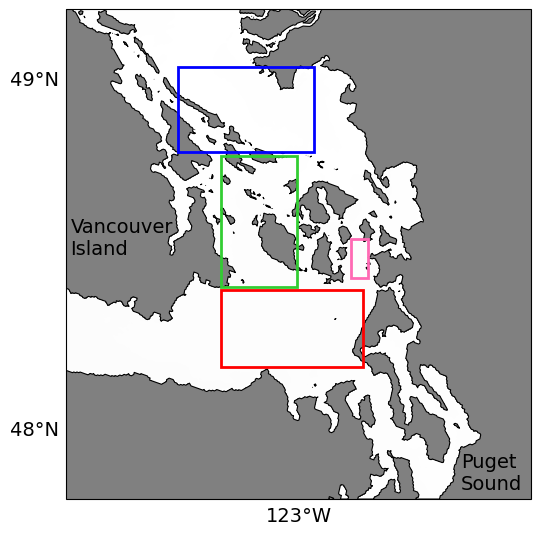

In [8]:
#Plot for boundaries of Ariane runs
import matplotlib.gridspec as gridspec

# Make plot area
xlim, ylim = [-124, -122], [47.8, 49.2]
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))

cmap = cma.Greys
cmap.set_bad('grey')
cmap.set_under('white')
# reversed_cmap = plt.cm.get_cmap('ocean_r')

# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_sal, mask=tmask[0])

c = ax.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=500, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,500,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='grey'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False

# Colorbar
# cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
# fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Convert geographic coordinates to Mercator projection - VicSill line
# vs_start_x, vs_start_y = ax.projection.transform_point(grid.nav_lon[233,190], grid.nav_lat[233,190], crs.Geodetic())
# vs_end_x, vs_end_y = ax.projection.transform_point(grid.nav_lon[303,175], grid.nav_lat[303,175], crs.Geodetic())

# # Plot the line on the map
# ax.plot([vs_start_x, vs_end_x], [vs_start_y, vs_end_y], color='orangered',lw=2.5)

# # Convert geographic coordinates to Mercator projection - PR line
# pr_start_x, pr_start_y = ax.projection.transform_point(grid.nav_lon[386,262], grid.nav_lat[386,262], crs.Geodetic())
# pr_end_x, pr_end_y = ax.projection.transform_point(grid.nav_lon[386,308], grid.nav_lat[386,308], crs.Geodetic())

# # Plot the line on the map
# ax.plot([pr_start_x, pr_end_x], [pr_start_y, pr_end_y], color='orangered',lw=2.5)

# # Convert geographic coordinates to Mercator projection - Gulf line
# gulf_start_x, gulf_start_y = ax.projection.transform_point(grid.nav_lon[386,215], grid.nav_lat[386,215], crs.Geodetic())
# gulf_end_x, gulf_end_y = ax.projection.transform_point(grid.nav_lon[386,253], grid.nav_lat[386,253], crs.Geodetic())

# # Plot the line on the map
# ax.plot([gulf_start_x, gulf_end_x], [gulf_start_y, gulf_end_y], color='orangered',lw=2.5)

# # Convert geographic coordinates to Mercator projection - Admiralty line 
# adm_start_x, adm_start_y = ax.projection.transform_point(grid.nav_lon[201,252], grid.nav_lat[201,252], crs.Geodetic())
# adm_end_x, adm_end_y = ax.projection.transform_point(grid.nav_lon[201,267], grid.nav_lat[201,267], crs.Geodetic())

# # Plot the line on the map
# ax.plot([adm_start_x, adm_end_x], [adm_start_y, adm_end_y], color='orangered',lw=2.5)

# # Convert geographic coordinates to Mercator projection - Deception 
# dec_start_x, dec_start_y = ax.projection.transform_point(grid.nav_lon[244,307], grid.nav_lat[244,307], crs.Geodetic())
# dec_end_x, dec_end_y = ax.projection.transform_point(grid.nav_lon[247,307], grid.nav_lat[247,307], crs.Geodetic())

# # Plot the line on the map
# ax.plot([dec_start_x, dec_end_x], [dec_start_y, dec_end_y], color='orangered',lw=2.5)

# # Convert geographic coordinates to Mercator projection - Rosario
# ros_start_x, ros_start_y = ax.projection.transform_point(grid.nav_lon[267,284], grid.nav_lat[267,284], crs.Geodetic())
# ros_end_x, ros_end_y = ax.projection.transform_point(grid.nav_lon[267,305], grid.nav_lat[267,305], crs.Geodetic())

# # Plot the line on the map
# # ax.plot([ros_start_x, ros_end_x], [ros_start_y, ros_end_y], color='lime',lw=3)

# # Convert geographic coordinates to Mercator projection - Haro
# haro_start_x, haro_start_y = ax.projection.transform_point(grid.nav_lon[300,217], grid.nav_lat[300,217], crs.Geodetic())
# haro_end_x, haro_end_y = ax.projection.transform_point(grid.nav_lon[300,242], grid.nav_lat[300,242], crs.Geodetic())

# Plot the line on the map
# ax.scatter(np.linspace(haro_start_x, haro_end_x,7), np.linspace(haro_start_y, haro_end_y,7), color='lime',s=5,zorder=3)

# Convert geographic coordinates to Mercator projection - Haro
# sjc_start_x, sjc_start_y = ax.projection.transform_point(grid.nav_lon[280,261], grid.nav_lat[280,261], crs.Geodetic())
# sjc_end_x, sjc_end_y = ax.projection.transform_point(grid.nav_lon[280,267], grid.nav_lat[280,267], crs.Geodetic())

# Plot the line on the map
# ax.plot(np.linspace(sjc_start_x, sjc_end_x,20), np.linspace(sjc_start_y, sjc_end_y,20),color='lime',lw=3)

# for ii in range(len(lat_stat_u)):
#     p1,p2 = ax.projection.transform_point(grid.nav_lon[lat_stat_u[ii],lon_stat_u[ii]], grid.nav_lat[lat_stat_u[ii],lon_stat_u[ii]], crs.Geodetic())
#     ax.scatter(p1,p2,color='lime',zorder=3,s=20)
    
# BP_lon,BP_lat = ax.projection.transform_point(grid.nav_lon[343,289], grid.nav_lat[343,289], crs.Geodetic())
# ax.scatter(BP_lon,BP_lat,color='lime',zorder=3,s=20)

# #IOS
# BP_lon,BP_lat = ax.projection.transform_point(grid.nav_lon[419,263], grid.nav_lat[419,263], crs.Geodetic())
# ax.scatter(BP_lon,BP_lat,color='lime',zorder=3,s=20)

ssog_lonmin,ssog_latmin = ax.projection.transform_point(-123.51667,48.796185, crs.Geodetic())
ssog_lonmax,ssog_latmax = ax.projection.transform_point(-122.93283,49.036263, crs.Geodetic())

rectangle = plt.Rectangle((ssog_lonmin,ssog_latmin), ssog_lonmax - ssog_lonmin, ssog_latmax - ssog_latmin, 
                          edgecolor='blue', facecolor='none', linewidth=2,zorder=3)

# Add the ssog box to the plot
ax.add_patch(rectangle)

haro_lonmin,haro_latmin = ax.projection.transform_point(-123.335,48.41217, crs.Geodetic())
haro_lonmax,haro_latmax = ax.projection.transform_point(-123.00784,48.783842, crs.Geodetic())

rectangle = plt.Rectangle((haro_lonmin,haro_latmin), haro_lonmax - haro_lonmin, haro_latmax - haro_latmin, 
                          edgecolor='limegreen', facecolor='none', linewidth=2,zorder=3)

# Add the haro box to the plot
ax.add_patch(rectangle)


ros_lonmin,ros_latmin = ax.projection.transform_point(-122.775,48.549, crs.Geodetic())
ros_lonmax,ros_latmax = ax.projection.transform_point(-122.70084,48.435835, crs.Geodetic())

rectangle = plt.Rectangle((ros_lonmin,ros_latmin), ros_lonmax - ros_lonmin, ros_latmax - ros_latmin, 
                          edgecolor='hotpink', facecolor='none', linewidth=2,zorder=3)

# Add the ros to the plot
ax.add_patch(rectangle)

ejdf_lonmin,ejdf_latmin = ax.projection.transform_point(-123.33366,48.1805, crs.Geodetic())
ejdf_lonmax,ejdf_latmax = ax.projection.transform_point(-122.724,48.40217, crs.Geodetic())

rectangle = plt.Rectangle((ejdf_lonmin,ejdf_latmin), ejdf_lonmax - ejdf_lonmin, ejdf_latmax - ejdf_latmin, 
                          edgecolor='red', facecolor='none', linewidth=2,zorder=3)

# Add the ejdf to the plot
ax.add_patch(rectangle)

ax.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax.transAxes)
ax.text(0.85, 0.02, 'Puget\nSound', transform=ax.transAxes);

In [11]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/model_eval_boxes.png',bbox_inches='tight')

Note that no CTDS in SJC so its purely Haro Strait and BP. 
Similarly, no CTD in gulf islands its just sog.

In [9]:
# Fig params
mask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

#Boundaries
vs_y = np.arange(233,303,1)
vs_x = np.linspace(177,177,len(vs_y))
adm_x = np.arange(252,267,1)
adm_y = np.linspace(201,201,len(adm_x))
dec_y = np.arange(244,247,1)
dec_x = np.linspace(307,307,len(dec_y))
ros_x = np.arange(284,305,1)
ros_y = np.linspace(267,267,len(ros_x))
sjc_x = np.arange(263,267,1)
sjc_y = np.linspace(280,280,len(sjc_x))
haro_x = np.arange(217,242,1)
haro_y = np.linspace(300,300,len(haro_x))

subdomain = [114, 397, 150, 450]



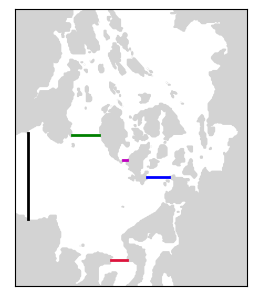

In [10]:
vs_y = np.arange(233,303,1)
vs_x = np.linspace(177,177,len(vs_y))
adm_x = np.arange(252,267,1)
adm_y = np.linspace(201,201,len(adm_x))
pr_x = np.arange(262,311,1)
pr_y = np.linspace(386,386,len(pr_x))
gulf_x = np.arange(216,251,1)
gulf_y = np.linspace(386,386,len(gulf_x))
ros_x = np.arange(284,305,1)
ros_y = np.linspace(267,267,len(ros_x))
sjc_x = np.arange(263,267,1)
sjc_y = np.linspace(280,280,len(sjc_x))
haro_x = np.arange(217,242,1)
haro_y = np.linspace(300,300,len(haro_x))

subdomain = [165, 375, 180, 400]
fig,ax1 = plt.subplots(1,1,figsize=(3, 4))

for attr, color in zip(['contourf', 'contour'], ['lightgray', 'lightgrey']):
    getattr(ax1, attr)(mesh.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax1.set_xlim(subdomain[:2])
ax1.set_ylim(subdomain[2:])
# [0]ax.set_xlabel('Grid X')
# [0]ax.set_ylabel('Grid Y')
ax1.set_xticks([])
ax1.set_yticks([])
viz_tools.set_aspect(ax1);

ax1.plot(vs_x,vs_y,color='k',lw=2)
ax1.plot(adm_x,adm_y,color='crimson',lw=2)
# ax1.plot(pr_x,pr_y,color='k',lw=2)
# ax1.plot(gulf_x,gulf_y,color='k',lw=2)
ax1.plot(ros_x,ros_y,color='blue',lw=2)
ax1.plot(sjc_x,sjc_y,color='m',lw=2)
ax1.plot(haro_x,haro_y,color='green',lw=2)

In [12]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_vs.png',bbox_inches='tight')

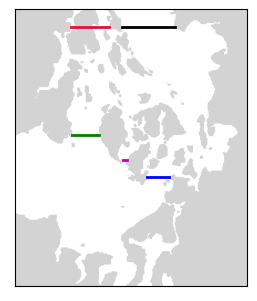

In [11]:
subdomain = [165, 375, 180, 400]
fig,ax1 = plt.subplots(1,1,figsize=(3, 4))

for attr, color in zip(['contourf', 'contour'], ['lightgray', 'lightgrey']):
    getattr(ax1, attr)(mesh.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax1.set_xlim(subdomain[:2])
ax1.set_ylim(subdomain[2:])
# [0]ax.set_xlabel('Grid X')
# [0]ax.set_ylabel('Grid Y')
ax1.set_xticks([])
ax1.set_yticks([])
viz_tools.set_aspect(ax1);

# ax1.plot(vs_x,vs_y,color='k',lw=2)
# ax1.plot(adm_x,adm_y,color='k',lw=2)
ax1.plot(pr_x,pr_y,color='k',lw=2)
ax1.plot(gulf_x,gulf_y,color='crimson',lw=2)
ax1.plot(ros_x,ros_y,color='blue',lw=2)
ax1.plot(sjc_x,sjc_y,color='m',lw=2)
ax1.plot(haro_x,haro_y,color='green',lw=2)

In [10]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_pr.png',bbox_inches='tight')

### Plot location for density difference calculations

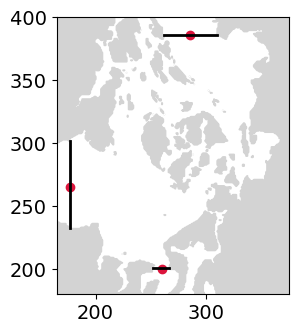

In [12]:
subdomain = [165, 375, 180, 400]
fig,ax1 = plt.subplots(1,1,figsize=(3, 4))

for attr, color in zip(['contourf', 'contour'], ['lightgray', 'lightgrey']):
    getattr(ax1, attr)(mesh.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax1.set_xlim(subdomain[:2])
ax1.set_ylim(subdomain[2:])
# [0]ax.set_xlabel('Grid X')
# [0]ax.set_ylabel('Grid Y')
viz_tools.set_aspect(ax1);

# ax1.plot(vs_x,vs_y,color='k',lw=2)
# ax1.plot(adm_x,adm_y,color='k',lw=2)
ax1.plot(vs_x,vs_y,color='k',lw=2)
ax1.plot(pr_x,pr_y,color='k',lw=2)
ax1.plot(adm_x,adm_y,color='k',lw=2)

ax1.scatter(260,200,color='crimson') # adm
ax1.scatter(285,386,color='crimson') # pr
ax1.scatter(177,265,color='crimson') # vs

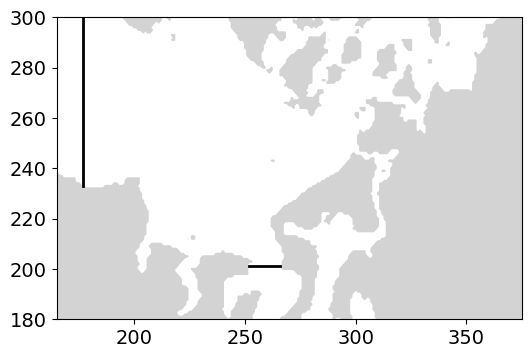

In [13]:
subdomain = [165, 375, 180, 300]
fig,ax1 = plt.subplots(1,1,figsize=(6, 8))

for attr, color in zip(['contourf', 'contour'], ['lightgray', 'lightgrey']):
    getattr(ax1, attr)(mesh.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax1.set_xlim(subdomain[:2])
ax1.set_ylim(subdomain[2:])
# [0]ax.set_xlabel('Grid X')
# [0]ax.set_ylabel('Grid Y')
viz_tools.set_aspect(ax1);

# ax1.plot(vs_x,vs_y,color='k',lw=2)
# ax1.plot(adm_x,adm_y,color='k',lw=2)
ax1.plot(vs_x,vs_y,color='k',lw=2)
ax1.plot(pr_x,pr_y,color='k',lw=2)
ax1.plot(adm_x,adm_y,color='k',lw=2)

# ax1.scatter(260,200,color='crimson') # adm
# ax1.scatter(285,386,color='crimson') # pr
# ax1.scatter(177,265,color='crimson') # vs